Dear Participant,

Please find below the Project 2 for Unsupervised Learning course. This is an individual assignment. 

The purpose of the case study is to classify a given silhouette as one of four different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
Four &quot;Corgie&quot; model vehicles were used for the experiment: a double decker bus, Cheverolet
van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

# 1. Use a new Python notebook and read the data set. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
#vehicle_df = pd.read_csv('vehicle.csv').dropna()
vehicle_df_row = pd.read_csv('vehicle.csv')
vehicle_df_row.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [2]:
vehicle_df_row.describe(include = 'all')

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000,846
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,car
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,429
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388,NaN
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797,NaN
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000,NaN
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000,NaN
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000,NaN
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000,NaN


In [3]:
#count for the missing values :
vehicle_df_row.isnull().sum(axis = 0)
#count_nan = len(vehicle_df) - vehicle_df.count()
#count_nan

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [4]:
# As the missing values are only on the few rows , it will be better to drop the missing values rows . 
#It will not be good replace with the mean or median value as all the rows many have diffrent category 
vehicle_df = vehicle_df_row.dropna()
print(vehicle_df_row.shape)
print(vehicle_df.shape)


(846, 19)
(813, 19)


In [5]:
#vehicle_df.isna().any()
vehicle_df_row.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [6]:
vehicle_df['class'] = vehicle_df['class'].replace({'van':'0','car':'1','bus':'2'}) 
vehicle_df['class']= vehicle_df['class'].astype(int)

C:\Users\Sony\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Sony\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


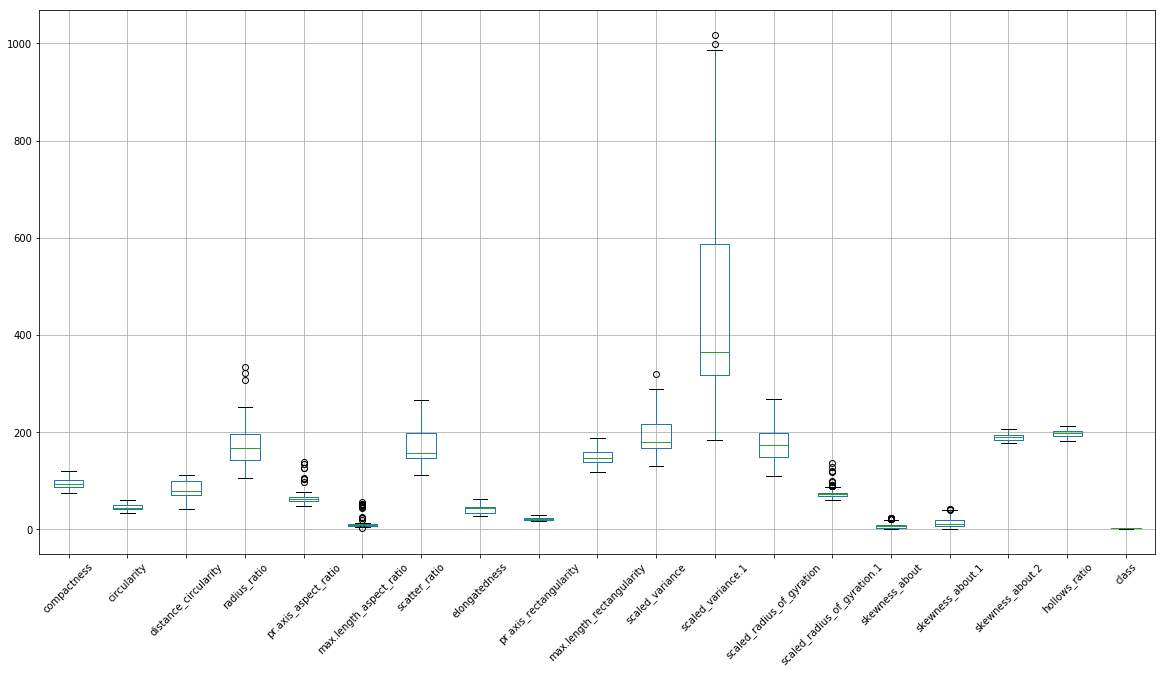

In [7]:
vehicle_df.boxplot(figsize = (20,10), rot=45)

# 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)

In [8]:
vehicle_df.groupby(["class"]).count()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
class,,,,,,,,,,,,,,,,,,
0,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195
1,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413,413
2,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205


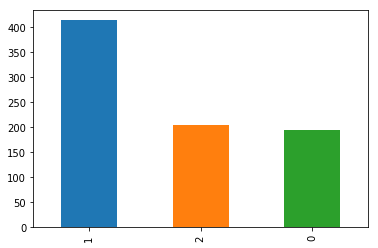

In [9]:
import matplotlib.pyplot as plt
vehicle_df['class'].value_counts().plot(kind='bar')

In [10]:
corr = vehicle_df.corr()
corr.T

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
compactness,1.000000,0.689885,0.789955,0.688130,0.090557,0.150369,0.814026,-0.788051,0.814227,0.674902,0.764386,0.820240,0.581405,-0.258437,0.231648,0.168384,0.296195,0.372806,0.037391
circularity,0.689885,1.000000,0.797704,0.623950,0.155023,0.251619,0.858149,-0.825108,0.856137,0.965366,0.806108,0.850932,0.935594,0.049070,0.141726,-0.001975,-0.113902,0.049331,0.161018
distance_circularity,0.789955,0.797704,1.000000,0.771404,0.163386,0.265591,0.909023,-0.912713,0.897261,0.773459,0.865683,0.891789,0.705689,-0.238145,0.110280,0.277851,0.145258,0.343228,0.067445
radius_ratio,0.688130,0.623950,0.771404,1.000000,0.667375,0.452460,0.743470,-0.795761,0.716210,0.570478,0.806788,0.731773,0.544636,-0.175348,0.044693,0.178079,0.375591,0.470895,0.199219
pr.axis_aspect_ratio,0.090557,0.155023,0.163386,0.667375,1.000000,0.652093,0.113696,-0.191193,0.086992,0.133553,0.290375,0.100668,0.135663,0.173060,-0.059244,-0.040769,0.229702,0.257566,0.114292
max.length_aspect_ratio,0.150369,0.251619,0.265591,0.452460,0.652093,1.000000,0.171445,-0.183242,0.167514,0.309180,0.331124,0.150069,0.197179,0.308329,0.016461,0.041210,-0.030543,0.139283,-0.202235
scatter_ratio,0.814026,0.858149,0.909023,0.743470,0.113696,0.171445,1.000000,-0.973413,0.991992,0.808154,0.950067,0.996396,0.795748,-0.045632,0.070118,0.227375,0.009967,0.138424,0.287590
elongatedness,-0.788051,-0.825108,-0.912713,-0.795761,-0.191193,-0.183242,-0.973413,1.000000,-0.950345,-0.771099,-0.937846,-0.956858,-0.761563,0.119750,-0.046621,-0.201325,-0.117568,-0.233408,-0.342712
pr.axis_rectangularity,0.814227,0.856137,0.897261,0.716210,0.086992,0.167514,0.991992,-0.950345,1.000000,0.811979,0.935653,0.992119,0.792895,-0.033769,0.078701,0.231171,-0.017383,0.117202,0.255354
max.length_rectangularity,0.674902,0.965366,0.773459,0.570478,0.133553,0.309180,0.808154,-0.771099,0.811979,1.000000,0.744760,0.796230,0.865240,0.031098,0.130356,0.013045,-0.108019,0.086792,0.025539


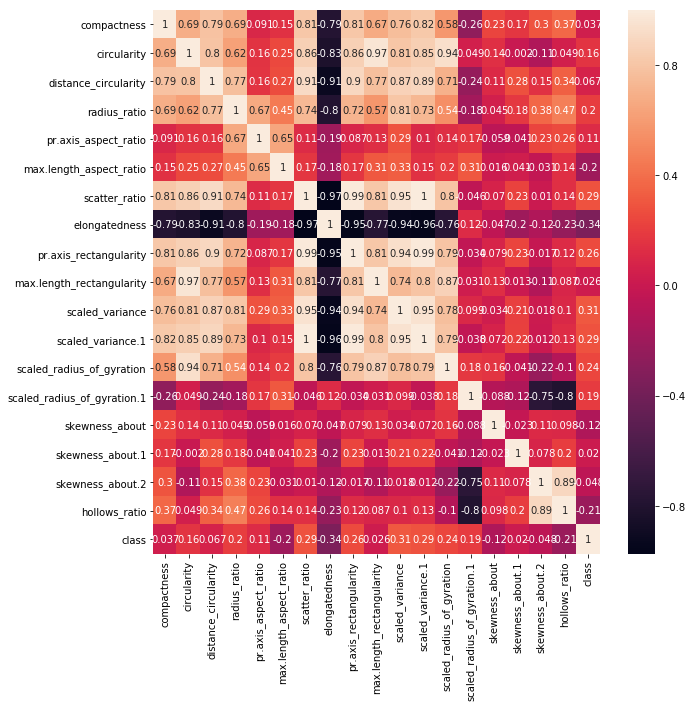

In [11]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)

Summary :
Based on the details , we will go via PC variables so that we can cover most of the feature component impact on the classification . Hence all the colums will be used 

# 3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points

In [12]:
X = vehicle_df.drop("class", axis=1)
Y = vehicle_df["class"] 

In [33]:
corr = X.corr()
corr.T

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.689885,0.789955,0.688130,0.090557,0.150369,0.814026,-0.788051,0.814227,0.674902,0.764386,0.820240,0.581405,-0.258437,0.231648,0.168384,0.296195,0.372806
circularity,0.689885,1.000000,0.797704,0.623950,0.155023,0.251619,0.858149,-0.825108,0.856137,0.965366,0.806108,0.850932,0.935594,0.049070,0.141726,-0.001975,-0.113902,0.049331
distance_circularity,0.789955,0.797704,1.000000,0.771404,0.163386,0.265591,0.909023,-0.912713,0.897261,0.773459,0.865683,0.891789,0.705689,-0.238145,0.110280,0.277851,0.145258,0.343228
radius_ratio,0.688130,0.623950,0.771404,1.000000,0.667375,0.452460,0.743470,-0.795761,0.716210,0.570478,0.806788,0.731773,0.544636,-0.175348,0.044693,0.178079,0.375591,0.470895
pr.axis_aspect_ratio,0.090557,0.155023,0.163386,0.667375,1.000000,0.652093,0.113696,-0.191193,0.086992,0.133553,0.290375,0.100668,0.135663,0.173060,-0.059244,-0.040769,0.229702,0.257566
max.length_aspect_ratio,0.150369,0.251619,0.265591,0.452460,0.652093,1.000000,0.171445,-0.183242,0.167514,0.309180,0.331124,0.150069,0.197179,0.308329,0.016461,0.041210,-0.030543,0.139283
scatter_ratio,0.814026,0.858149,0.909023,0.743470,0.113696,0.171445,1.000000,-0.973413,0.991992,0.808154,0.950067,0.996396,0.795748,-0.045632,0.070118,0.227375,0.009967,0.138424
elongatedness,-0.788051,-0.825108,-0.912713,-0.795761,-0.191193,-0.183242,-0.973413,1.000000,-0.950345,-0.771099,-0.937846,-0.956858,-0.761563,0.119750,-0.046621,-0.201325,-0.117568,-0.233408
pr.axis_rectangularity,0.814227,0.856137,0.897261,0.716210,0.086992,0.167514,0.991992,-0.950345,1.000000,0.811979,0.935653,0.992119,0.792895,-0.033769,0.078701,0.231171,-0.017383,0.117202
max.length_rectangularity,0.674902,0.965366,0.773459,0.570478,0.133553,0.309180,0.808154,-0.771099,0.811979,1.000000,0.744760,0.796230,0.865240,0.031098,0.130356,0.013045,-0.108019,0.086792


In [35]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = X.columns[columns]
X_1 = X[selected_columns]
X_1.shape

(813, 12)

In [13]:
X.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# conveted to zscore 
sc = StandardScaler() 
X_std =  sc.fit_transform(X_1)           
cov_matrix = np.cov(X_std.T) 
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00123153  0.69073497  0.79092746  0.68897729  0.09066804  0.1505537
  -0.78902127 -0.25875528  0.23193313  0.16859183  0.29656022  0.3732647 ]
 [ 0.69073497  1.00123153  0.79868656  0.62471862  0.15521415  0.25192897
  -0.8261242   0.0491303   0.1419004  -0.00197723 -0.1140426   0.04939203]
 [ 0.79092746  0.79868656  1.00123153  0.77235395  0.16358689  0.26591783
  -0.9138366  -0.23843852  0.11041593  0.278193    0.14543699  0.34365085]
 [ 0.68897729  0.62471862  0.77235395  1.00123153  0.66819724  0.45301698
  -0.79674104 -0.17556405  0.04474816  0.17829807  0.37605357  0.47147529]
 [ 0.09066804  0.15521415  0.16358689  0.66819724  1.00123153  0.6528959
  -0.19142882  0.17327362 -0.05931667 -0.04081886  0.22998448  0.25788318]
 [ 0.1505537   0.25192897  0.26591783  0.45301698  0.6528959   1.00123153
  -0.18346816  0.30870835  0.01648166  0.04126053 -0.03058065  0.13945419]
 [-0.78902127 -0.8261242  -0.9138366  -0.79674104 -0.19142882 -0.18346816
   1.0012315

C:\Users\Sony\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Sony\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [37]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 3.88509161e-01  3.51565447e-02 -2.29997213e-01 -9.80514336e-02
   2.69225689e-03 -1.65443031e-02 -7.63328753e-01 -4.25262939e-01
   1.26578916e-01  6.81652900e-02  2.90310105e-02  6.18967316e-05]
 [ 3.37007189e-01  3.00173305e-01 -2.19680725e-01 -1.29874464e-01
  -1.46990815e-01 -1.35773407e-01  2.97019858e-01 -8.91547028e-02
  -4.38512010e-02 -1.45596461e-01 -7.79470096e-02 -7.52188856e-01]
 [ 4.14174830e-01  1.21966923e-01 -1.96643948e-01  9.25242203e-02
  -3.18795785e-03 -1.69880113e-01  2.32840108e-01  7.19003610e-02
   9.89691928e-02 -3.81052876e-01  6.05447099e-01  3.95648490e-01]
 [ 4.22314797e-01  7.57645795e-02  1.96781334e-01  3.54979890e-02
  -6.51904107e-02  3.37808418e-01  5.64819279e-02 -8.18244563e-02
  -7.42567907e-01 -5.35430928e-02 -2.16508008e-01  2.15702333e-01]
 [ 1.88460879e-01  1.17463014e-01  6.32245848e-01 -4.65519024e-02
  -1.76990736e-02  4.36586840e-01  1.59178926e-01 -2.99195206e-01
   4.65176404e-01  2.88958437e-02  1.44498582e-01 -7.0

In [38]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(4.736172764300962, array([ 0.38850916,  0.33700719,  0.41417483,  0.4223148 ,  0.18846088,
        0.16829372, -0.40168056, -0.16353896,  0.07340374,  0.11359568,
        0.20447868,  0.27121956])), (2.5011034221813464, array([ 0.03515654,  0.30017331,  0.12196692,  0.07576458,  0.11746301,
        0.24699692, -0.17631287,  0.54047368, -0.05085066, -0.06976406,
       -0.51439895, -0.46688504])), (1.7361493836067377, array([-0.22999721, -0.21968072, -0.19664395,  0.19678133,  0.63224585,
        0.51493111,  0.20638523,  0.14320088, -0.14903695, -0.09389632,
        0.17951857,  0.17379372])), (1.06774229752824, array([-0.09805143, -0.12987446,  0.09252422,  0.03549799, -0.0465519 ,
       -0.03948552, -0.08691252, -0.00257875, -0.70532626,  0.66915507,
       -0.08438257,  0.00608532])), (0.9124506649093742, array([ 0.00269226, -0.14699082, -0.00318796, -0.06519041, -0.01769907,
        0.22865502,  0.12769002,  0.12755002,  0.64894637,  0.68067821,
       -0.06622245,  0.01080491])

In [39]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 18 entries as there are 18 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 18 entries with 18 th entry 
# cumulative reaching almost 100%


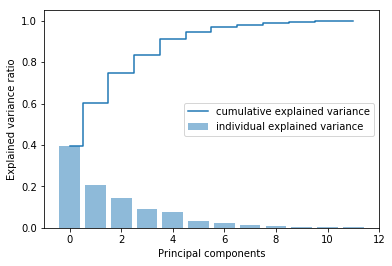

In [44]:
plt.bar(range(0,12), var_explained, alpha=0.5, align='center', label='individual explained variance') 
plt.step(range(0,12),cum_var_exp, where= 'mid', label='cumulative explained variance') 
plt.ylabel('Explained variance ratio') 
plt.xlabel('Principal components') 
plt.legend(loc = 'best') 
plt.show()

# PC which covers more than 95% of the variance as below 

In [45]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:6])   # Reducing from 18 to 6 dimension space so that it will cover for 95% of explained varience 

X_std_4D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_4D)  # converting array to dataframe for pairplot

In [46]:
Proj_data_df.head()

,0,1,2,3,4,5
0,0.686290,0.280781,0.782666,0.176511,0.157364,0.227552
1,-0.755377,-0.660138,-0.231503,-0.205122,0.687434,-0.630474
2,2.548891,0.970900,-0.491850,-1.346694,0.457679,0.360043
3,0.330440,-2.490948,0.785954,-0.265191,-0.294037,-0.534395
4,0.070817,8.212375,9.212235,-0.977210,3.277189,-2.055410


C:\Users\Sony\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Sony\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Sony\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


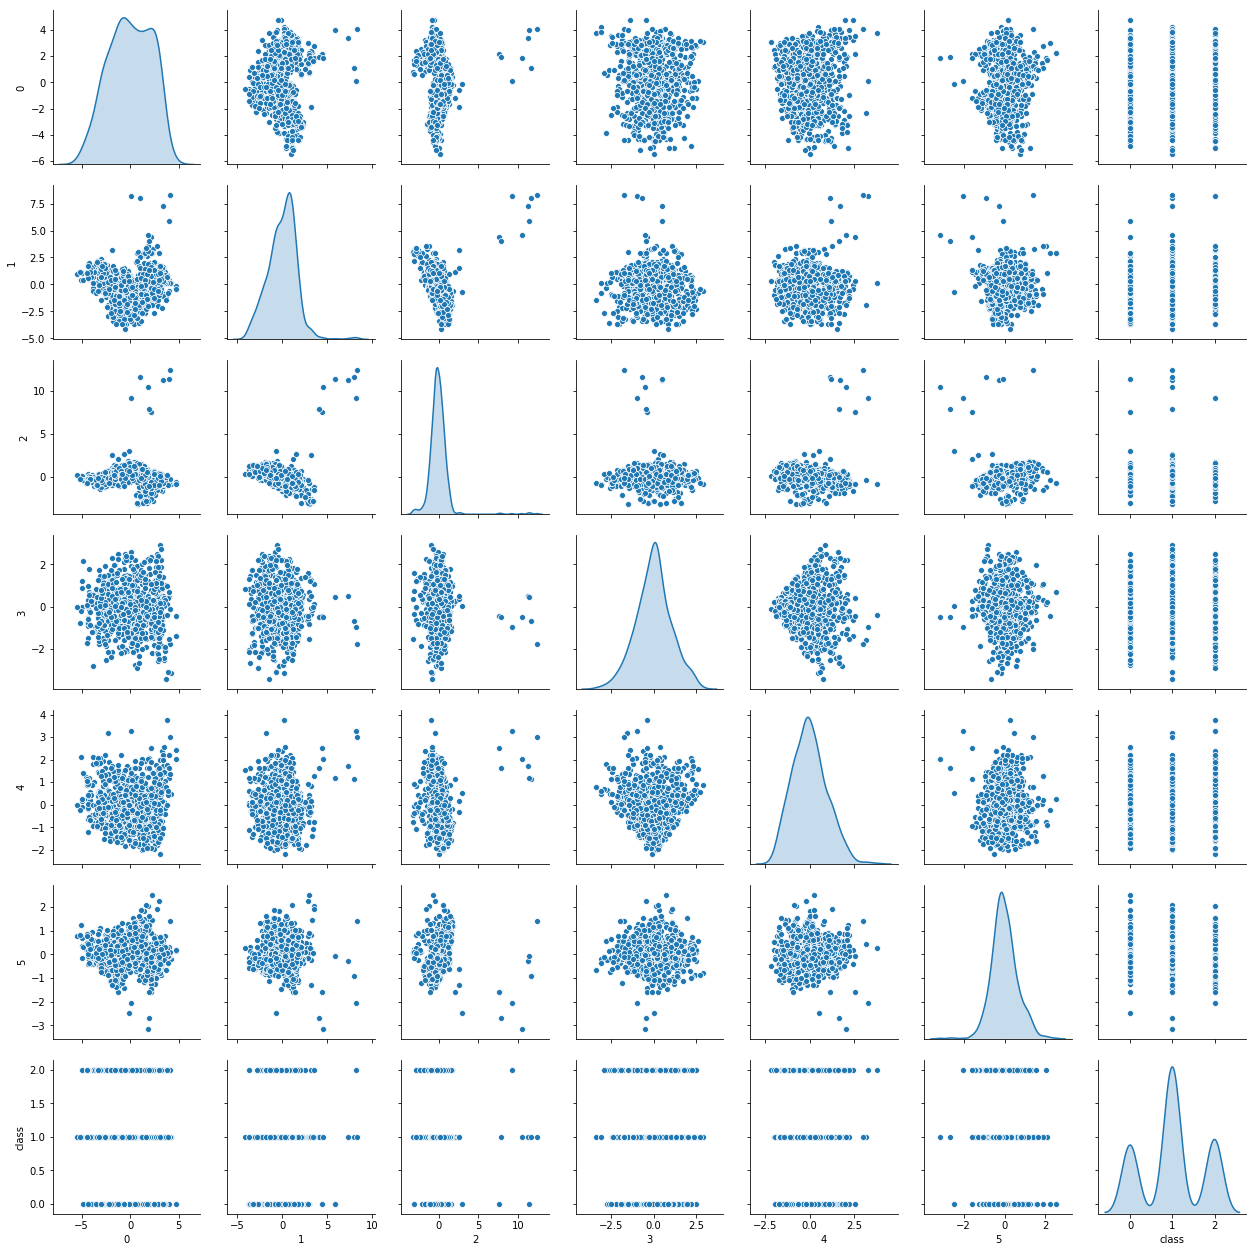

In [47]:
#Let us check it visually
Proj_data_vehicle_df = Proj_data_df.join(Y)

sns.pairplot(Proj_data_vehicle_df, diag_kind='kde') 

# 4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. (10 points)

In [48]:
from sklearn import model_selection

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(Proj_data_df, Y, test_size=test_size, random_state=seed)

In [52]:
#Running SVM with default hyperparameter
from sklearn.svm import SVC
from sklearn import metrics
model = SVC()
model.fit(X_train, y_train)

C:\Users\Sony\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [53]:
y_pred=model.predict(X_test)
print('Accuracy Score for test data:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score for test data:
0.860655737704918


In [54]:
#acccuracy score for train data:
model.score(X_train, y_train)

0.9279437609841827

In [55]:
#Default Linear kernel

model_L=SVC(kernel='linear')
model_L.fit(X_train,y_train)
y_pred=model_L.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.75


In [56]:
# Default RBF kernel

model_R=SVC(kernel='rbf')
model_R.fit(X_train,y_train)
y_pred=model_R.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.860655737704918


C:\Users\Sony\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [58]:
#Performing K-fold cross validation with different kernels
# CV on Linear kernel

from sklearn.model_selection import cross_val_score
model_L=SVC(kernel='linear')
scores = cross_val_score(model_L, X, Y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.96385542 0.97590361 1.         0.92682927 1.         0.925
 0.975      0.9375     0.9375     0.975     ]


In [59]:
print(scores.mean())

0.9616588304437261


In [61]:
# CV on rbf kernel
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
model_R=SVC(kernel='rbf')
scores = cross_val_score(model_R, X, Y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.5060241  0.5060241  0.51807229 0.5        0.51219512 0.5125
 0.5125     0.5125     0.5125     0.5125    ]


In [62]:
print(scores.mean())

0.5104815603878932


In [81]:
kernal = ['rbf','linear']
gamma = [1,1.8,2,3,4,5,8,9,10,100,500,1000,2000,5000]
result = pd.DataFrame()
for k in kernal:
    for g in gamma:
        model = SVC(C=g,kernel = k)
        model.fit(X_train, y_train)
        result = result.append({'kernel':k,'C':g,'accuracy':model.score(X_test, y_test)},ignore_index=True) 
        


In [82]:
result

,C,accuracy,kernel
0,1.0,0.860656,rbf
1,1.8,0.881148,rbf
2,2.0,0.881148,rbf
3,3.0,0.893443,rbf
4,4.0,0.901639,rbf
5,5.0,0.905738,rbf
6,8.0,0.901639,rbf
7,9.0,0.897541,rbf
8,10.0,0.885246,rbf
9,100.0,0.852459,rbf


In [72]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [107]:
param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 5, 5.5 ]    } ]

In [108]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [109]:
gs.fit(X_train, y_train) 

C:\Users\Sony\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 5, 5.5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [110]:
gs.best_estimator_

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [111]:
print(gs.best_params_)

{'C': 5, 'kernel': 'rbf'}


In [112]:
y_pred= gs.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

0.9057377049180327


## As per Grid Search the best parameter was C: 5  and best Kernal is 'rbf' where we got the accuracy of 90%